###  Task 1:
Consider the problem of maximizing the function
f(x)=(-x^2)/10+3x
where x is allowed to vary between 0 and 31. You must perform following tasks in the code.

1. Representation of states (solutions): To solve this using a genetic algorithm, we must encode the possible values of x as chromosomes. For this problem, we will encode x as a binary integer of length 5. Thus the chromosomes for our genetic algorithm will be sequences of 0's and 1's with a length of 5 bits, and have a range from 0 (00000) to 31 (11111).

2. Fitness function:
The fitness function for it will be: 
f(x)=(-x^2)/10+3x

To begin the algorithm, we select an initial population of 10 chromosomes at random. The resulting initial population of chromosomes is shown in Table 1. Next we take the x-value that each chromosome represents and test its fitness with the fitness function. The resulting fitness values are recorded in the third column of Table 1.
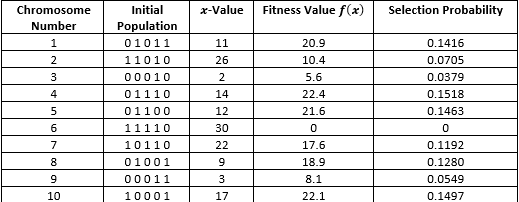

3. Operators:
	Apply cross over in every generation.
	Apply mutation after every 3 generations.

4. Termination criteria: Your loop should stop when the value of one of your candidate’s fitness function is greater or equal to 90%.


In [2]:
import copy
import random
def initialize_population(_p,i_p):
    i=0
    for c in _p:
        _p[c][0]=i_p[i]
        i+=1
    return _p
def Find_x_value_of_chromosome(_p):
    length=0
    sum=0
    for c in _p:
        length = len(_p[c][0])
        p = length-1
        si=0

        # converting binary chromosomes into decimal X value
        decimal=0
        while si<length:
            bit = int(_p[c][0][si])
            decimal += bit*(2**p)
            p-=1
            si+=1
        _p[c][1]=decimal
        sum+=decimal
    return _p,sum,length

def fitness_val_function(_p):
    for c in _p:
        r =-1.0*(((_p[c][1])**2.0)/10.0) + (3.0*_p[c][1])
        r = float("{:.1f}".format(r))
        if r>31:
            _p[c][2] = 0
        _p[c][2] = r
    return _p

def selection_probability(_p,sig_sum):
    for c in _p:
        _p[c][3] = float("{:.1f}".format(((_p[c][2]*1.0)/(sig_sum*1.0))*100))
    return _p

def any_selection_prob_greater_than(inum,_p):
    for c in _p:
        if _p[c][3]>=inum:
            return True
    return False

def Reproduction(_p,length):
    i=1
    i_p=[]
    length = len(_p)
    while i<length:
        if _p[str(i)][4] == False:
            _p[str(i)][4] = True
            cross1 = _p[str(i)][0]
            cross2 = None
            while True:
                j = random.randint(1,10)
                if j!=i and _p[str(j)][4]==False:
                    point= random.randint(1,3)
                    print("single point cross over location = ",point)
                    _p[str(j)][4] = True
                    cross2 = _p[str(j)][0]
                    print("parents : ",cross1 , " < - > ",cross2)
                    c1a = cross1[:point]
                    c1b = cross1[point:]
                    c2a = cross2[:point]
                    c2b = cross2[point:]
                    temp1 =c1a+c2b
                    temp2 =c2a+c1b
                    print("childs  : ",temp1 , " ***** ",temp2)
                    print("\n")
                    i_p.append(temp1)
                    i_p.append(temp2)
                    break
        i+=1
    return i_p

def Mutation(i_p):
    j=0
    i=0
    length = len(i_p)
    while i<length:
        j=random.randint(0,4)
        if i_p[i][j]=='0':
            i_p[i] = i_p[i][:j]+'1'+i_p[i][j+1:]
        elif i_p[i][j]=='1':
            i_p[i] = i_p[i][:j]+'0'+i_p[i][j+1:]
        i+=1
    return i_p

        


# def convert_decimal_to_binary_list_of_strings(_p,length):
#     i_p=[]
#     str1 = ""
#     i=0
#     while i<length:
#         str1+="0"
#         i+=1
#     for c in _p:
#         TLength = length-1
#         str2 = copy.deepcopy(str1)
#         number = _p[c][3]
#         while TLength>-1:
#             rem = int(number%2)
#             number = int(number/2)
#             str2 = str2[:TLength] + str(rem) + str2[TLength+1:]
#             TLength-=1
#         i_p.append(str2)
#     return i_p
    

initial_population = ["01011","11010","00010","01110","01100","11110","10110","01001","00011","10001"]

gen = 0
while True:
    _population = {
        "1":[None,None,None,None,False],
        "2":[None,None,None,None,False],
        "3":[None,None,None,None,False],
        "4":[None,None,None,None,False],
        "5":[None,None,None,None,False],
        "6":[None,None,None,None,False],
        "7":[None,None,None,None,False],
        "8":[None,None,None,None,False],
        "9":[None,None,None,None,False],
       "10":[None,None,None,None,False]
    }
    _population =initialize_population(_population,initial_population)
    _population,sigma_sum,length = Find_x_value_of_chromosome(_population)
    _population = fitness_val_function(_population)
    _population = selection_probability(_population,sigma_sum)
    for c in _population:
        print(c+" : ",end="")
        for d in _population[c]:
            print("\t",d,end="")
        print()
    print("\n")
    if any_selection_prob_greater_than(25.0,_population)==True:
        break
    initial_population = Reproduction(_population,length)
    if gen==3:
        initial_population = Mutation(initial_population)
        gen=-1
    #print(initial_population)
    #initial_population = convert_decimal_to_binary_list_of_strings(_population,length)
    #print(initial_population)
    gen+=1



1 : 	 01011	 11	 20.9	 14.3	 False
2 : 	 11010	 26	 10.4	 7.1	 False
3 : 	 00010	 2	 5.6	 3.8	 False
4 : 	 01110	 14	 22.4	 15.3	 False
5 : 	 01100	 12	 21.6	 14.8	 False
6 : 	 11110	 30	 0.0	 0.0	 False
7 : 	 10110	 22	 17.6	 12.1	 False
8 : 	 01001	 9	 18.9	 12.9	 False
9 : 	 00011	 3	 8.1	 5.5	 False
10 : 	 10001	 17	 22.1	 15.1	 False


single point cross over location =  2
parents :  01011  < - >  00011
childs  :  01011  *****  00011


single point cross over location =  1
parents :  11010  < - >  10110
childs  :  10110  *****  11010


single point cross over location =  2
parents :  00010  < - >  01100
childs  :  00100  *****  01010


single point cross over location =  1
parents :  01110  < - >  10001
childs  :  00001  *****  11110


single point cross over location =  1
parents :  11110  < - >  01001
childs  :  11001  *****  01110


1 : 	 01011	 11	 20.9	 14.3	 False
2 : 	 00011	 3	 8.1	 5.5	 False
3 : 	 10110	 22	 17.6	 12.1	 False
4 : 	 11010	 26	 10.4	 7.1	 False
5 : 	 00100